In [2]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator
from qiskit.quantum_info import Statevector
sim = QasmSimulator() # making new simulator object


# Loading the IBM Quantum account(s)
provider = IBMQ.load_account()

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


# 1. Interpreting gates in various ways.

## 1.1: Understanding the CNOT gate

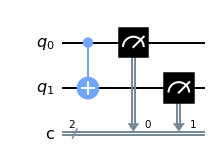

In [3]:
qc = QuantumCircuit(2, 2)
qc.cx(0,1)
qc.measure([0,1],[0,1])
qc.draw()

In [4]:
job = sim.run(qc)      # runing the experiment
result = job.result()  # get the results
result.get_counts() # no effect of cx on |00>

{'00': 1024}

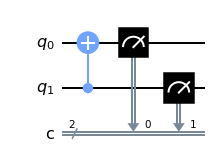

In [5]:
qc = QuantumCircuit(2, 2)
qc.cx(1,0)
qc.measure([0,1],[0,1])
qc.draw() 

In [6]:
job = sim.run(qc)      # runing the experiment
result = job.result()  # get the results
result.get_counts() # no effect of cx on |00>, reversed

{'00': 1024}

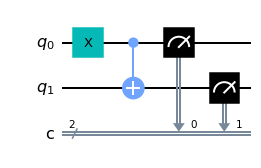

In [7]:
qc = QuantumCircuit(2, 2)
qc.x(0)
qc.cx(0,1)
qc.measure([0,1],[0,1])
qc.draw()

In [8]:
job = sim.run(qc)      # runing the experiment
result = job.result()  # get the results
result.get_counts() #affects |10>

{'11': 1024}

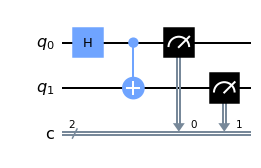

In [9]:
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0,1)
qc.measure([0,1],[0,1])
qc.draw()

In [10]:
job = sim.run(qc)      # runing the experiment
result = job.result()  # get the results
result.get_counts() #we get an entagled state with (H)(cx) [here, its |phi.plus>]
# [cx]|+0> = |phi.plus>

{'00': 509, '11': 515}

## 1.2: Understanding the CZ gate

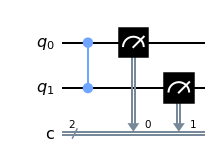

In [11]:
qc = QuantumCircuit(2, 2)
qc.cz(0,1)
qc.measure([0,1],[0,1])
qc.draw() 

In [12]:
job = sim.run(qc)      # runing the experiment
result = job.result()  # get the results
result.get_counts() # no effect of cz on |00>

{'00': 1024}

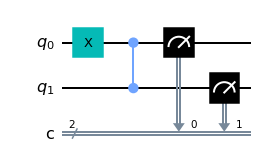

In [13]:
qc = QuantumCircuit(2, 2)
qc.x(0)
qc.cz(0,1)
qc.measure([0,1],[0,1])
qc.draw() 

In [14]:
job = sim.run(qc)
result = job.result()
result.get_counts() # no effect of cz on |01>

{'01': 1024}

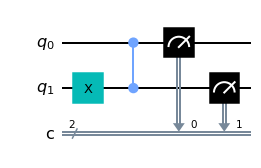

In [15]:
qc = QuantumCircuit(2, 2)
qc.x(1)
qc.cz(0,1)
qc.measure([0,1],[0,1])
qc.draw() 

In [16]:
job = sim.run(qc)
result = job.result()
result.get_counts() # no effect of cz on |10> (symmetry, interpret as target-contro, or not)

{'10': 1024}

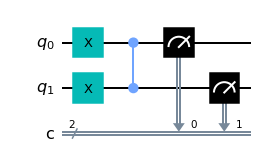

In [17]:
qc = QuantumCircuit(2, 2)
qc.x(0)
qc.x(1)
qc.cz(0,1)
qc.measure([0,1],[0,1])
qc.draw() 

In [18]:
job = sim.run(qc)
result = job.result()
result.get_counts() # no effect of cx on |11>? (not really)

{'11': 1024}

In [19]:
qc = QuantumCircuit(2)
qc.x(0)
qc.x(1)
qc.cz(0,1)

ket = Statevector(qc)

ket.draw() # although we can only measure 11 when we do a measurement, the phase of qubits has changed!

'Statevector([ 0.+0.j,  0.+0.j,  0.+0.j, -1.+0.j],\n            dims=(2, 2))'

## 1.3: Alternate interpretations

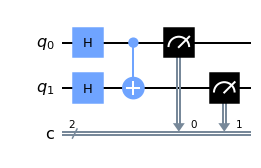

In [24]:
# applying a CNOT or CX to |++>

qc = QuantumCircuit(2, 2)
qc.h(0)
qc.h(1)
qc.cx(0,1)
qc.measure([0,1],[0,1])
qc.draw()

In [25]:
job = sim.run(qc)
result = job.result()
result.get_counts() #no effect

{'01': 262, '11': 235, '00': 259, '10': 268}

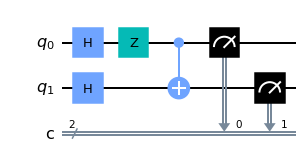

In [26]:
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.h(1)
qc.z(0) #changing the target to |-> state
qc.cnot(0,1)
qc.measure([0,1],[0,1])
qc.draw()

In [27]:
job = sim.run(qc)
result = job.result()
result.get_counts() #no effect on measurements

{'11': 255, '00': 260, '10': 268, '01': 241}

In [29]:
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.h(1)
qc.z(0)
qc.cnot(1,0)
qc.draw()

ket = Statevector(qc)
ket.draw() #we see |+-> is converted to |-->, also known as 'phase kickback'

'Statevector([ 0.5+0.j, -0.5+0.j, -0.5+0.j,  0.5+0.j],\n            dims=(2, 2))'

### Quantum Communication: Use 2 qubits to transmit 2 bits?

In [3]:
# Define a 2-bit message
MESSAGE = '11'

# Alice encodes the message
qc_alice = QuantumCircuit(2, 2)
if MESSAGE[-1]=='1':
    qc_alice.x(0)
if MESSAGE[-2]=='1':
    qc_alice.x(1)

In [4]:
from qiskit import Aer
backend = Aer.get_backend('aer_simulator')

# Bob measures
qc_bob = QuantumCircuit(2,2)
qc_bob.measure([0,1],[0,1])

backend.run(qc_alice.compose(qc_bob)).result().get_counts()

{'11': 1024}

# 2. Entanglement

## 2.1: Entaglement after encoding

In [54]:
MESSAGE = '01'

qc_alice = QuantumCircuit(2,2)

# Alice encodes the message
if MESSAGE[-1]=='1':
    qc_alice.x(0)
if MESSAGE[-2]=='1':
    qc_alice.x(1)

# then she creates entangled states
qc_alice.h(1)
qc_alice.cx(1,0)

ket = Statevector(qc_alice)
ket.draw() # no real advantage here

'Statevector([0.        +0.j, 0.70710678+0.j, 0.70710678+0.j,\n             0.        +0.j],\n            dims=(2, 2))'

In [55]:
qc_bob = QuantumCircuit(2,2)
qc_bob.cx(1,0)
qc_bob.h(1)
qc_bob.measure([0,1],[0,1])

backend.run(qc_alice.compose(qc_bob)).result().get_counts()

{'01': 1024}

## 2.2: A different implementation of 2.1

In [7]:
MESSAGE = '00'

qc_alice = QuantumCircuit(2,2)
qc_alice.h(1)
qc_alice.cx(1,0)

if MESSAGE[-2]=='1':
    qc_alice.z(1)
if MESSAGE[-1]=='1': #this method can work by manipulating only one qubit
    qc_alice.x(1)

ket = Statevector(qc_alice)
ket.draw()

'Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,\n             0.70710678+0.j],\n            dims=(2, 2))'

In [8]:
backend.run(qc_alice.compose(qc_bob)).result().get_counts() #Bob doesnt need to change his circuit

{'11': 509, '00': 515}

## 2.3: What if it involves a third party?

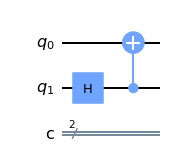

In [64]:
# Imagine a third party: Charlie creates an enatgled state
# sends the secoond qubit directly to Bob and th first qubit to Alice

qc_charlie = QuantumCircuit(2,2)

qc_charlie.h(1)
qc_charlie.cx(1,0)

qc_charlie.draw()

In [21]:
# Alice can encode a 2-qubit messsage and send it to Bob just using one qubit

MESSAGE = '01'

qc_alice = QuantumCircuit(2,2)

if MESSAGE[-2]=='1':
    qc_alice.z(1)
if MESSAGE[-1]=='1':
    qc_alice.x(1)

In [22]:
# Bob can run the standard mesurement procedure

complete_qc = qc_charlie.compose(qc_alice.compose(qc_bob))
backend.run(complete_qc).result().get_counts()

{'01': 1024}

# 3. Types of quantum measurements

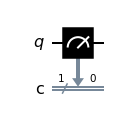

In [23]:
# the standard mesurement is also known as z mesurement

meas_z = QuantumCircuit(1,1)
meas_z.measure(0,0)

meas_z.draw()

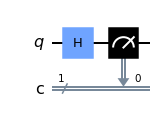

In [66]:
# appling a z gate just before the measurement is known as x mesurement

meas_x = QuantumCircuit(1,1)
meas_x.h(0)
meas_x.measure(0,0)

meas_x.draw()

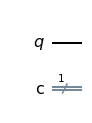

In [25]:
# mesurements on |0> state

qc = QuantumCircuit(1,1)

qc.draw()

In [26]:
for basis,circ in [('z', meas_z), ('x', meas_x)]:
    print('Results from ' + basis + ' measurement:',
      backend.run(qc.compose(circ)).result().get_counts())

Results from z measurement: {'0': 1024}
Results from x measurement: {'0': 541, '1': 483}


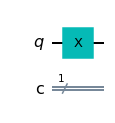

In [27]:
# mesurements on |1> state

qc = QuantumCircuit(1,1)
qc.x(0)

qc.draw()

In [28]:
for basis,circ in [('z', meas_z), ('x', meas_x)]:
    print('Results from ' + basis + ' measurement:',
      backend.run(qc.compose(circ)).result().get_counts())

Results from z measurement: {'1': 1024}
Results from x measurement: {'0': 506, '1': 518}


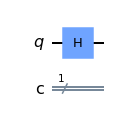

In [29]:
# mesurements on |+> state

qc = QuantumCircuit(1,1)
qc.h(0)

qc.draw()

In [30]:
for basis,circ in [('z', meas_z), ('x', meas_x)]:
    print('Results from ' + basis + ' measurement:',
      backend.run(qc.compose(circ)).result().get_counts())

Results from z measurement: {'1': 520, '0': 504}
Results from x measurement: {'0': 1024}


In [31]:
from math import pi

qc = QuantumCircuit(1, 1)
qc.ry(-pi/4, 0) #-pi/4 rotation

for basis,circ in [('z', meas_z), ('x', meas_x)]:
    print('Results from ' + basis + ' measurement:',
      backend.run(qc.compose(circ)).result().get_counts())

Results from z measurement: {'1': 148, '0': 876}
Results from x measurement: {'0': 162, '1': 862}
